In [17]:
import matplotlib.pyplot as plt
import numpy as np
import dataToVar as dat

In [18]:
def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

In [19]:
def r2surf(zlist,zlistfit):
    zlist = np.array(zlist)
    zlistfit = np.array(zlistfit)
    st = sum((zlist-np.average(zlist))**2)
    sr = sum((zlist-zlistfit)**2)
    r2 = 1-sr/st
    return r2


full = dat.modRetrainCool
# six = dat.cool100_60
# fou = dat.cool100_40

sixData = full[2][3367:6737]
fouData = full[2][9706:]
sixTherm = full[1][3367:6737]
fouTherm = full[1][9706:]


# print(fif[0][1])

a = 40 - 34#np.average(fouData[-10:])
b = 60 - 50#np.average(sixData[-10:])
# c = 40 - np.average(fou[2][-10])

xx = np.array([40,60])
yy = np.array([a,b])#,c])
aa,bb = np.polyfit(xx,yy,1)
# plt.plot(xx,yy,'o')
# plt.plot(xx,aa*xx**2+bb*xx+cc)

;
print(r2(yy,aa*xx+bb))
print('offset =',aa,'* therm +',bb)
# aa = 0.001783387081181651
# bb = -0.12568814551147064
# cc = 4.697092470876827


1.0
offset = 0.19999999999999982 * therm + -1.9999999999999885
51.27
35.54


In [20]:
rr = {}
# set = [50,70,90,100]

shortest = min(len(sixData),len(fouData))
ytot = [fouData[:shortest],sixData[:shortest]]
xtot = [fouTherm[:shortest],sixTherm[:shortest]]

zlist = []
for i in ytot:
    for j in i:
        zlist.append(j)

big = np.arange(0.8,1,0.00001)
for i in big:
    zlistfit = []
    for j in range(len(ytot)):
        old = ytot[j][0]
        # ans = []
       

        for k in xtot[j]:
            if str(k) == 'nan':
                print('fix csv')
                break
            else:
                offset = aa*k+bb
                old = old*i+(k-offset)*(1-i)
                zlistfit.append(old)
        

    r = r2surf(zlist,zlistfit)
    if r >0 and r<1:
        rr[r] = i

# print(rr)
print('r2 =',max(rr)) 
   
trust = rr[max(rr)] 
print('a =',trust)
# trust = .9992

r2 = 0.974896987161022
a = 0.999089999999094


''

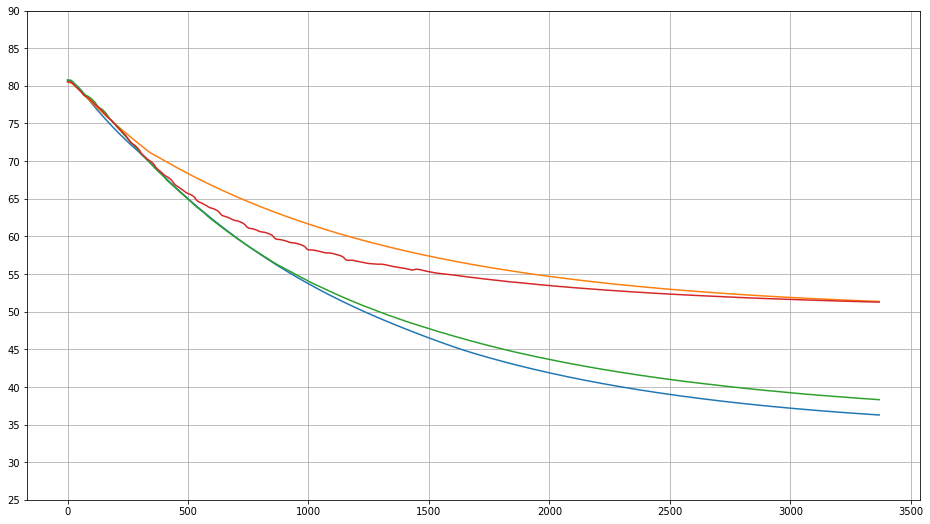

In [21]:
plt.figure(figsize=(16,9))
for j in range(len(ytot)):
    old = ytot[j][0]
    ans = []
 
    for k in xtot[j]:
        offset = aa*k+bb
        old = old*trust+(k-offset)*(1-trust)
        ans.append(old)
    plt.plot(ans)

for i in ytot:
    plt.plot(i) 
plt.grid()
plt.yticks(np.arange(25,95,5))
;